### Principal Component Analysis (PCA) using scikit learn image dataset of famous people.

Original dataset: Classes 5749, Samples total 13233  

Data is narrowed to 2063 images. In this example, a matrix is constructed in a way that each image is stretched to a one row. The size of the matrix is 2063 rows and 5655 columns.

In [11]:
#Import libraries
import sklearn
from sklearn.datasets import fetch_lfw_people #Image dataset
import matplotlib.pyplot as plt
import numpy as np

#Read face data and filter the dataset. Load the images of persons who have at least 20 images in the dataset. Resize images to 70% of original size
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape #Shape of the first image. Shape-attribute gives dimensions of the array (87,65) -> Variable is used later

print(image_shape)

(87, 65)


In [ ]:
#Create 2 rows and 3 columns grid and show few examples of the images (grayscale them)
fig, axes = plt.subplots(2, 5, figsize=(10, 8), subplot_kw={'xticks': (), 'yticks': ()})
j=1
n = 0
# Iterate over 6 first images in the dataset. Start from the very first one image (n=0)
for i in range(n,n+6):
    plt.subplot(2,3,j)
    plt.imshow(people.images[i], cmap="gray") # Grayscaling
    plt.title(people.target_names[people.target[i]]) # Sets the title of each image (= Name of the person)
    j=j+1 # Increment the value and move to next item

#### Data preparations and creating matrix A

Matrix A has the original data

In [3]:
#Select at maximum 50 images of each person & create a matrix X_people where each image is streched into one row
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target): # np.unique finds unique elements of an array
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask] #Image data to X_people matrix
#y_people = people.target[mask]

names = people.target_names[people.target[mask]] #Names of people in the images

# Scale the grayscale values to be between 0 and 1 for better numeric stability (original data has values between 0 and 255) 
X_people = X_people / 255.

X_people.shape # (2063, 5655) --> 2063 'images' and 5655 pixels in each image, all the pixel values in a one row

(2063, 5655)

Singular value decomposition: technique to decompose a matrix into three other matrices. Any matrix A can be factorized as A = USVᵀ 
  
V: Principal components  
S: Diagonal matrix which indicates the overall importance of each component  
U: Weight parameters for each row.  



In [4]:
#Calculate singular value decomposition (USV) from X_people matrix using svd function

u, s, v = np.linalg.svd(X_people)

#### Visualising singular value decomposition  

Graph 'Percentage of variance explained': means that at least 500 principal components are needed in order to explain 80% of variance = person in the image  
Graph 's variance explained': means that the first component explains most of the data variance  



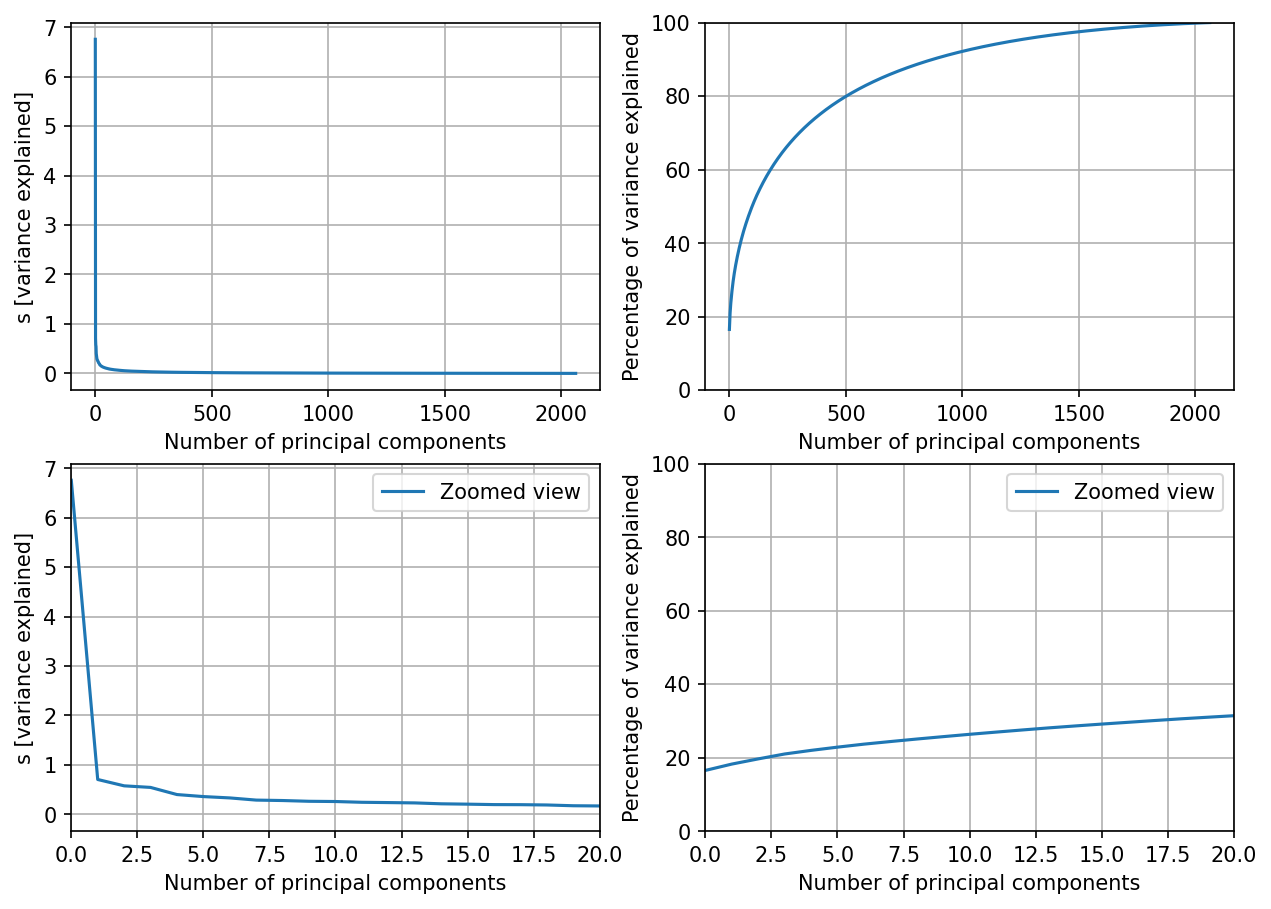

In [5]:
#Visualize singular value decomposition

plt.figure(figsize=(10,7), dpi = 150)
plt.subplot(2,2,1)
plt.plot(s)
plt.ylabel('s [variance explained]')
plt.xlabel('Number of principal components')
plt.grid()
plt.subplot(2,2,2)
plt.plot(np.cumsum(s)/np.sum(s)*100)
plt.ylim([0,100])
plt.ylabel('Percentage of variance explained')
plt.xlabel('Number of principal components')
plt.grid()

plt.subplot(2,2,3)
plt.plot(s)
plt.ylabel('s [variance explained]')
plt.xlabel('Number of principal components')
plt.legend(['Zoomed view'])
plt.xlim([0,20])
plt.grid()
plt.subplot(2,2,4)
plt.plot(np.cumsum(s)/np.sum(s)*100)
plt.ylabel('Percentage of variance explained')
plt.xlabel('Number of principal components')
plt.legend(['Zoomed view'])
plt.xlim([0,20])
plt.ylim([0,100])
plt.grid()

#### Visualising principal components

First principal component is considered the most common 'pattern' in face images ('eigenfaces')

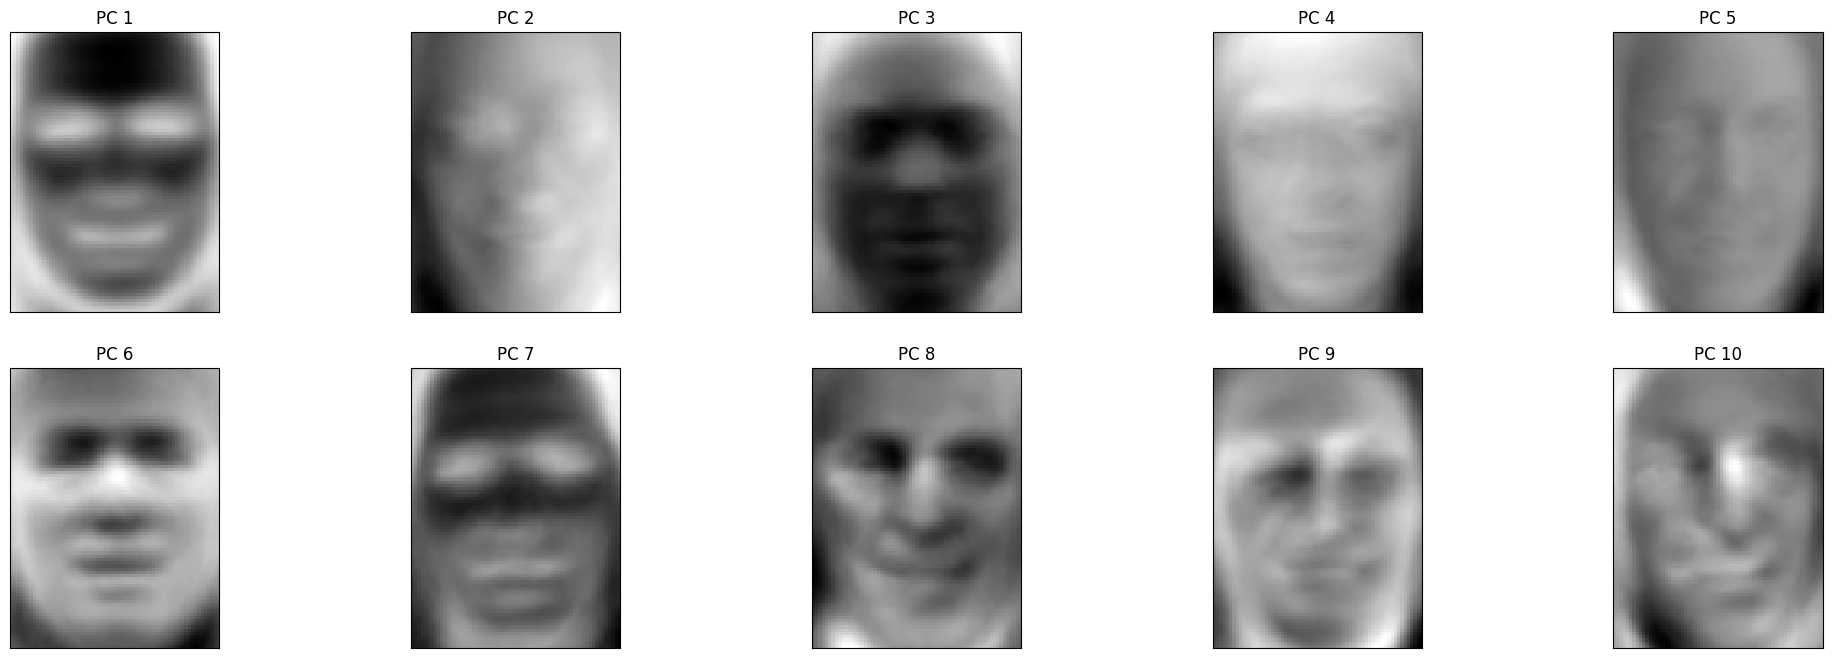

In [6]:
#Create 2 rows and 5 columns grid and show first 10 principal components which are obtained from SVD

fig, axes = plt.subplots(2, 5, figsize=(25, 8), subplot_kw={'xticks': (), 'yticks': ()})
j=1
n = 0
for i in range(n,n+10):
    plt.subplot(2,5,j)
    plt.imshow(v[i,:].reshape(image_shape), cmap="gray") # v (matrix) contains singular vectors obtained from an SVD operation.Images should also be reshaped (variable image_shape is created earlier!)
    title = 'PC ' + str(i+1) # Title, PC = Principal component
    plt.title(title)
    j=j+1

#### Mathematical calculations  

As aiming to visualize images using different amount of PC's, let's conduct a matrix calculation

In [7]:
# The function u, s, v = np.linalg.svd() returns s as a row vector, which cannot be multplied with u
#Let's create a diagonal matrix S where the values of s are in the diagonal 

S= np.zeros((X_people.shape[0], X_people.shape[1]))
nc=X_people.shape[0] #Keep all the components
S[:nc, :nc] = np.diag(s[:nc])
uS = np.matmul(u,S)

In [8]:
s.shape

(2063,)

#### How many principal components are needed that an image is making sense?

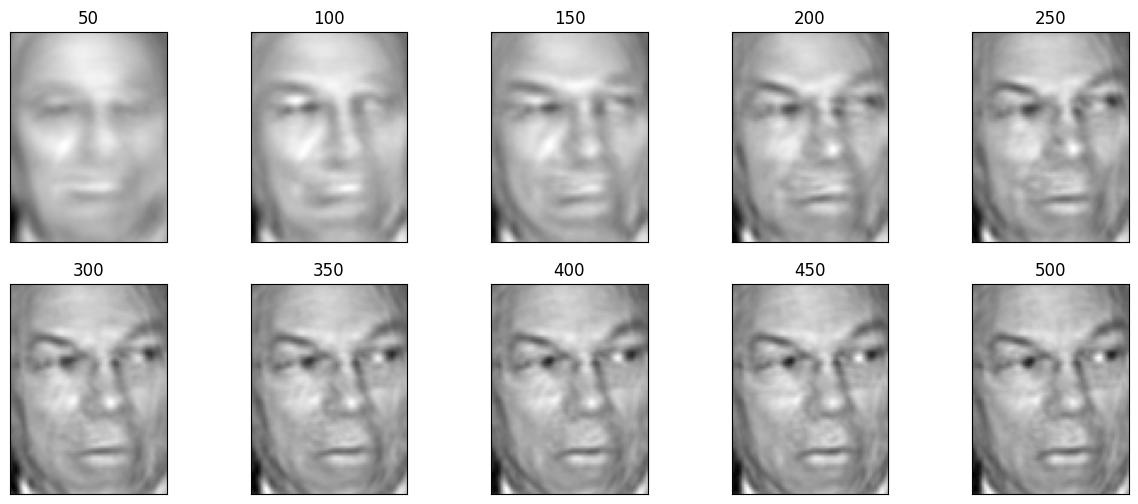

In [9]:
#Visualize images using a different amount of principal components 

img_number = 5  #Select the celebrity's face to use 

M= np.zeros((X_people.shape[1]))
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks': (), 'yticks': ()})


n_comp = 50 # Start with 50 components
for j in range(10):
    reduc_img= np.zeros((X_people.shape[1]))
    for i in range(n_comp):
        reduc_img = reduc_img + v[i,:]*uS[img_number,i] # One component v[i,:] (spooky images) multiplied with one number
        #Note here that v[i,:] does not depend on face selection and uS[img_number,i] is a single number!
        
    plt.subplot(2,5,j+1)
    plt.imshow(reduc_img.reshape(image_shape), cmap="gray") 
    plt.title(n_comp)
    n_comp = n_comp + 50 # Number of components that are added to next image

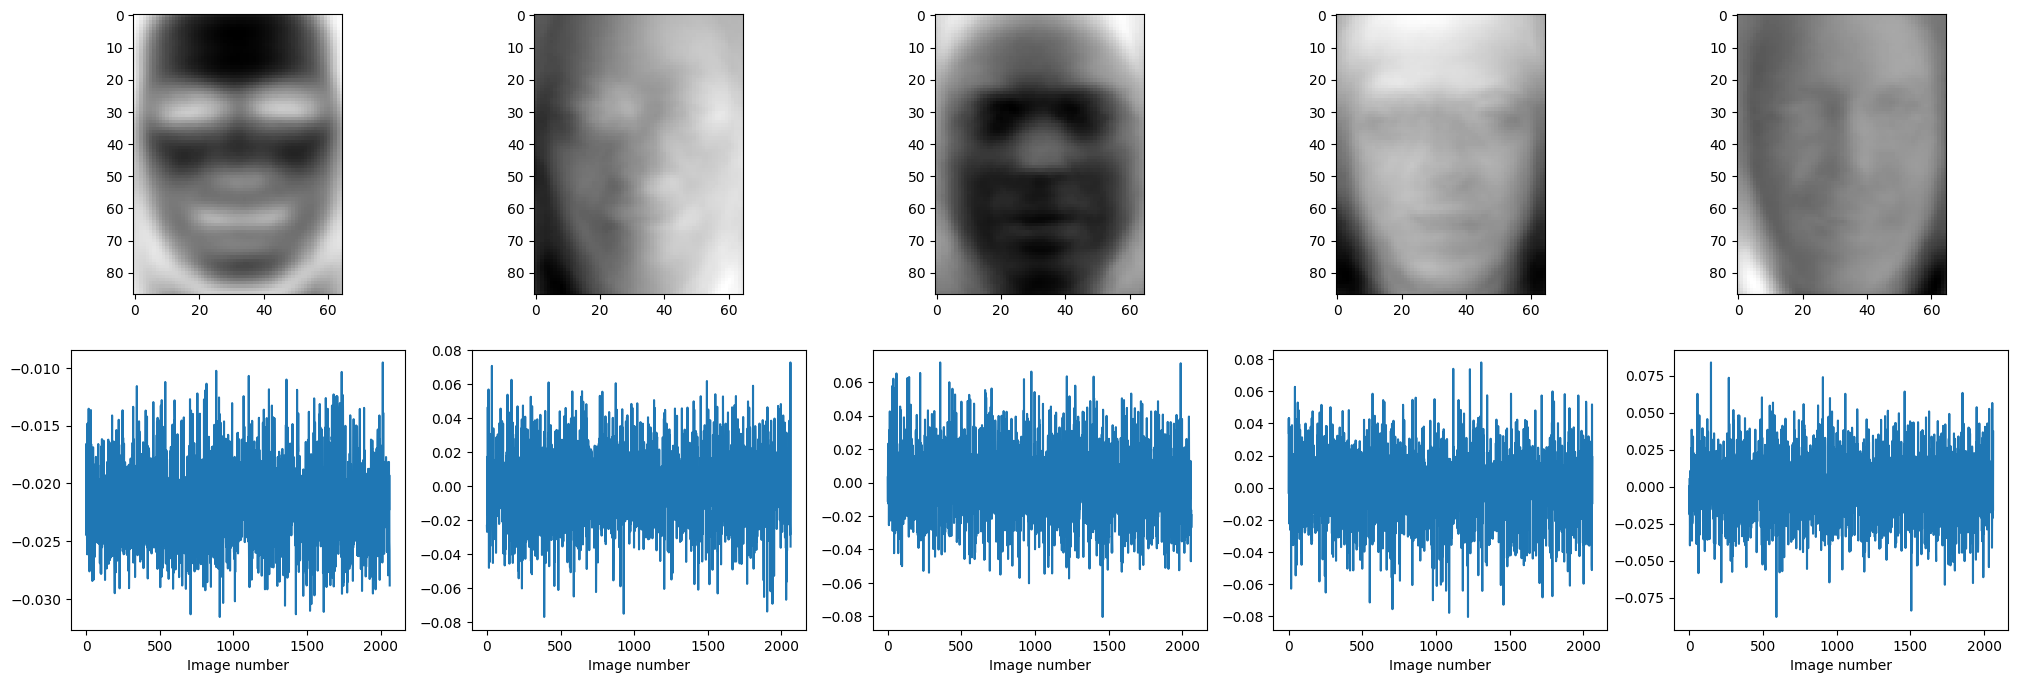

In [10]:
#Visualize pricipal components and weights:

fig, axes = plt.subplots(2, 5, figsize=(25, 8)) #, subplot_kw={'xticks': (), 'yticks': ()})
j=1
n = 0
for i in range(n,n+5):
    plt.subplot(2,5,j)
    plt.imshow(v[i,:].reshape(image_shape),cmap='gray')
    plt.subplot(2,5,j+5)
    plt.xlabel('Image number')
    plt.plot(u[:,i])
    j=j+1

    # First image is reverse image -> negative

### Problems in the dataset

##### Conclusions:  
- Poorly re-processed images  
- Characters look in different directions; some of them wear glasses, some of them has microphone in front of mouth area  
- Face area is not constant  
- Most of the faces are male  
- Most of the faces are white  

Principal components are reflecting much the image quality (direction, light, face expression, glasses…), not the faces in images -> Centered face is required for the algorithm to work correctly